# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [60]:
##Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib.pyplot as plt
%matplotlib inline



In [61]:
df= pd.read_csv("C:/Users/Nageswar/AIML/Labs/Residency3/R3_Internal_PGPAIML_ML_Hyd_Apr'19/students-data.csv",delimiter=";")
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [62]:
df.shape

(395, 33)

# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [63]:
df.index.name='number'
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [64]:
df.describe(include="all")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


In [65]:
pd.options.mode.use_inf_as_na = True
df.isna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
#There are no columns wihtout data.

 # Transform Data

Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

 Answer:

In [67]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [68]:
#Displaying the Non-numerical data
df.select_dtypes(exclude ='Int64').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [69]:
cols=df.var()<1
npcols=cols.index[cols==True]
npcols

Index(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'], dtype='object')

In [70]:
df_out=df.drop(npcols,axis=1)
df_out.shape

(395, 27)

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
#cols = df.columns[df.dtypes.eq('object')]
#get categorical variables
colsNew=df_out.dtypes==object
cat_cols=colsNew.index[colsNew==True]
cat_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [73]:
enc = LabelEncoder()

for cols in cat_cols:
    df_out[cols]=enc.fit_transform(df_out[cols])
df_out.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [74]:
df_out["DV_G1"]=df_out["G1"].map(lambda
         x: 1 if x>10 else 0)
df_out["G1"],df_out["DV_G1"]

df_out["DV_G2"]=df_out["G2"].map(lambda
         x: 1 if x>10 else 0)
df_out["DV_G3"]=df_out["G3"].map(lambda
         x: 1 if x>10 else 0)

df_out=df_out.drop("G1",axis=1)
df_out=df_out.drop("G2",axis=1)
df_out=df_out.drop("G3",axis=1)
#","G2","G3"]
df_out.shape

(395, 27)

# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [75]:
X=df_out.drop("DV_G3",axis=1)
Y=df_out["DV_G3"]
print(df.shape,df_out.shape,X.shape,Y.shape)
X.head()


(395, 33) (395, 27) (395, 26) (395,)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,DV_G1,DV_G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,0


# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=300/395, random_state=0)
print(X_train.shape,X_test.shape)

(300, 26) (95, 26)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [77]:
import statsmodels.formula.api as sm
import statsmodels.api
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lgr=LogisticRegression()
clf=lgr.fit(X_train,y_train)
clf.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [78]:
accuracy_score(y_train,clf.predict(X_train))

0.9366666666666666

In [79]:
accuracy_score(y_test,clf.predict(X_test))

0.9157894736842105

# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [80]:
clf.intercept_

array([0.27602091])

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [81]:
clf.coef_

array([[-1.11096208,  0.00769093, -0.12285684,  0.3531555 , -0.10187781,
        -0.44372025,  0.14826679,  0.06616815, -0.02593877, -0.14215909,
        -0.22454956, -0.29058669,  0.59701044, -0.02375349, -0.02045713,
        -0.05349466, -0.87208751,  0.22450923,  0.51956278,  0.57785254,
        -0.03065845, -0.1348485 , -0.00826927,  0.01434583,  2.14579569,
         3.67355571]])

In [82]:
df_new=pd.DataFrame(clf.coef_,columns=X.columns) 
df_new.transpose()

,0
school,-1.110962
sex,0.007691
age,-0.122857
address,0.353156
famsize,-0.101878
Pstatus,-0.443720
Medu,0.148267
Fedu,0.066168
Mjob,-0.025939
Fjob,-0.142159


In [83]:
#Conclusion:  DV_G2 is having the highest impact on the dependent variable

# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [84]:
lgr=LogisticRegression()
#clf=lgr.fit(X_test,y_test)
clf.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [85]:
accuracy_score(y_test,clf.predict(X_test))

0.9157894736842105

In [86]:
accuracy_score(y_train,clf.predict(X_train))

0.9366666666666666

# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [87]:
dfbc2=pd.read_csv("bc2.csv")
dfbc2.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [88]:
dfbc2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [89]:
dfbc2.shape

(699, 11)

In [90]:
dfbc2.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [91]:
dfbc2.sum()

ID                                                                     749121165
ClumpThickness                                                              3088
Cell Size                                                                   2191
Cell Shape                                                                  2242
Marginal Adhesion                                                           1962
Single Epithelial Cell Size                                                 2248
Bare Nuclei                    1102411010111113391111011071?17111111511111107...
Normal Nucleoli                                                             2403
Bland Chromatin                                                             2004
Mitoses                                                                     1111
Class                                                                       1880
dtype: object

### Check Missing Values

In [92]:
#from the above data, the variable Bare Nuclei is having the missing data


Q3=dfbc2.quantile(.75)
Q1=dfbc2.quantile(.25)
IQR=Q3-Q1

print("IQR=",IQR)

df_out2=dfbc2[~((dfbc2< (Q1 - 1.5 * IQR)) |(dfbc2> (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out2.shape)

IQR= ID                             367609.5
ClumpThickness                      4.0
Cell Size                           4.0
Cell Shape                          4.0
Marginal Adhesion                   3.0
Single Epithelial Cell Size         2.0
Normal Nucleoli                     3.0
Bland Chromatin                     3.0
Mitoses                             0.0
Class                               2.0
dtype: float64
(491, 11)


### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [93]:
df_out2.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,491,NaN,NaN,NaN,1.07169e+06,261355,320675,1.00918e+06,1.17703e+06,1.24092e+06,1.37192e+06
ClumpThickness,491,NaN,NaN,NaN,3.389,2.18095,1,1,3,5,10
Cell Size,491,NaN,NaN,NaN,1.75967,1.75525,1,1,1,2,10
Cell Shape,491,NaN,NaN,NaN,1.92668,1.84023,1,1,1,2,10
Marginal Adhesion,491,NaN,NaN,NaN,1.61711,1.35075,1,1,1,1.5,8
Single Epithelial Cell Size,491,NaN,NaN,NaN,2.26069,0.996557,1,2,2,2,7
Bare Nuclei,491,10,1,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,491,NaN,NaN,NaN,2.45621,1.57908,1,1,2,3,9
Bland Chromatin,491,NaN,NaN,NaN,1.48473,1.3345,1,1,1,1,8
Mitoses,491,NaN,NaN,NaN,1,0,1,1,1,1,1


In [94]:
# From the above data, there are 11 Unique values in the Bare Nuclei variable.

In [95]:
df_out2['Bare Nuclei'].count() + (df_out2['Bare Nuclei'].str.find("?", 0).sum())

11

In [96]:
#There are 16 rows wiht the value ?  dfbc2['Bare Nuclei']  .astype(int)

In [97]:
df_out2['Bare Nuclei'] = df_out2['Bare Nuclei'].replace({'?':df_out2['Bare Nuclei'].describe().top})
df_out2['Bare Nuclei'].sum()
                                                         

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


'1102411010111133111111171111111111791145102211111211311112811111111115131019352321211111121111115118213110111111211111101110111101011111111111151118111115815171101121112101111101110411111111011110110511111511111015111110110110110111010111111811311331111111111111111111011211111111111411112111110311311111111118101111432111111111101115111101111111111111131411011111111111141111111111011511111111111111211111111111111111111113121111111011111101011011111111111111111112111451111111211111111111411111111111118111111111111111115121'

In [98]:
df_out2['Bare Nuclei']

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
9       1
10      1
11      1
12      3
13      3
15      1
16      1
17      1
19      1
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
30      1
31      1
33      1
34      1
35      1
       ..
656     1
659     1
660     1
661     1
663     1
664     1
665     1
667     1
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
682     1
683     1
684     1
685     1
686     1
687     1
688     1
690     1
691     5
692     1
694     2
695     1
Name: Bare Nuclei, Length: 491, dtype: object

In [99]:
df_out2.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,491,NaN,NaN,NaN,1.07169e+06,261355,320675,1.00918e+06,1.17703e+06,1.24092e+06,1.37192e+06
ClumpThickness,491,NaN,NaN,NaN,3.389,2.18095,1,1,3,5,10
Cell Size,491,NaN,NaN,NaN,1.75967,1.75525,1,1,1,2,10
Cell Shape,491,NaN,NaN,NaN,1.92668,1.84023,1,1,1,2,10
Marginal Adhesion,491,NaN,NaN,NaN,1.61711,1.35075,1,1,1,1.5,8
Single Epithelial Cell Size,491,NaN,NaN,NaN,2.26069,0.996557,1,2,2,2,7
Bare Nuclei,491,9,1,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,491,NaN,NaN,NaN,2.45621,1.57908,1,1,2,3,9
Bland Chromatin,491,NaN,NaN,NaN,1.48473,1.3345,1,1,1,1,8
Mitoses,491,NaN,NaN,NaN,1,0,1,1,1,1,1


### Print and plot the distribution of target variable (Class - using Histogram) 

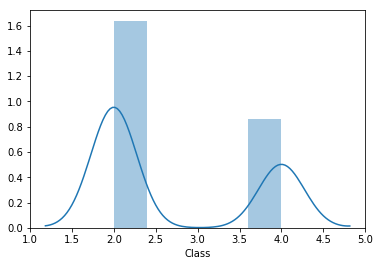

In [100]:
import seaborn as sns
sns.distplot(dfbc2["Class"])

### convert the datatype of Bare Nuclei to `int`

In [101]:
df_out2['Bare Nuclei']=df_out2['Bare Nuclei'].astype('int')

df_out2.describe(include="all").transpose()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max
ID,491.0,1.071689e+06,261354.815759,320675.0,1009185.0,1177027.0,1240917.5,1371920.0
ClumpThickness,491.0,3.389002e+00,2.180947,1.0,1.0,3.0,5.0,10.0
Cell Size,491.0,1.759674e+00,1.755250,1.0,1.0,1.0,2.0,10.0
Cell Shape,491.0,1.926680e+00,1.840231,1.0,1.0,1.0,2.0,10.0
Marginal Adhesion,491.0,1.617108e+00,1.350749,1.0,1.0,1.0,1.5,8.0
Single Epithelial Cell Size,491.0,2.260692e+00,0.996557,1.0,2.0,2.0,2.0,7.0
Bare Nuclei,491.0,2.083503e+00,2.564903,1.0,1.0,1.0,1.0,10.0
Normal Nucleoli,491.0,2.456212e+00,1.579078,1.0,1.0,2.0,3.0,9.0
Bland Chromatin,491.0,1.484725e+00,1.334499,1.0,1.0,1.0,1.0,8.0
Mitoses,491.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0


### Standardization of Data (Use Standard Scaler)

In [102]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(df_out2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [103]:
scaled_data.columns=df_out2.columns
scaled_data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.274483,0.739422,-0.433243,-0.504081,-0.457329,-0.261860,-0.422865,0.344722,-0.363597,0.0,-0.376644
1,-0.263299,0.739422,1.277659,1.127812,2.507011,4.760533,3.089618,0.344722,0.386512,0.0,-0.376644
2,-0.215499,-0.178546,-0.433243,-0.504081,-0.457329,-0.261860,-0.032589,0.344722,-0.363597,0.0,-0.376644
3,-0.212236,1.198406,3.558862,3.303669,-0.457329,0.742619,0.747963,0.344722,4.137057,0.0,-0.376644
4,-0.209379,0.280438,-0.433243,-0.504081,1.024841,-0.261860,-0.422865,0.344722,-0.363597,0.0,-0.376644


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

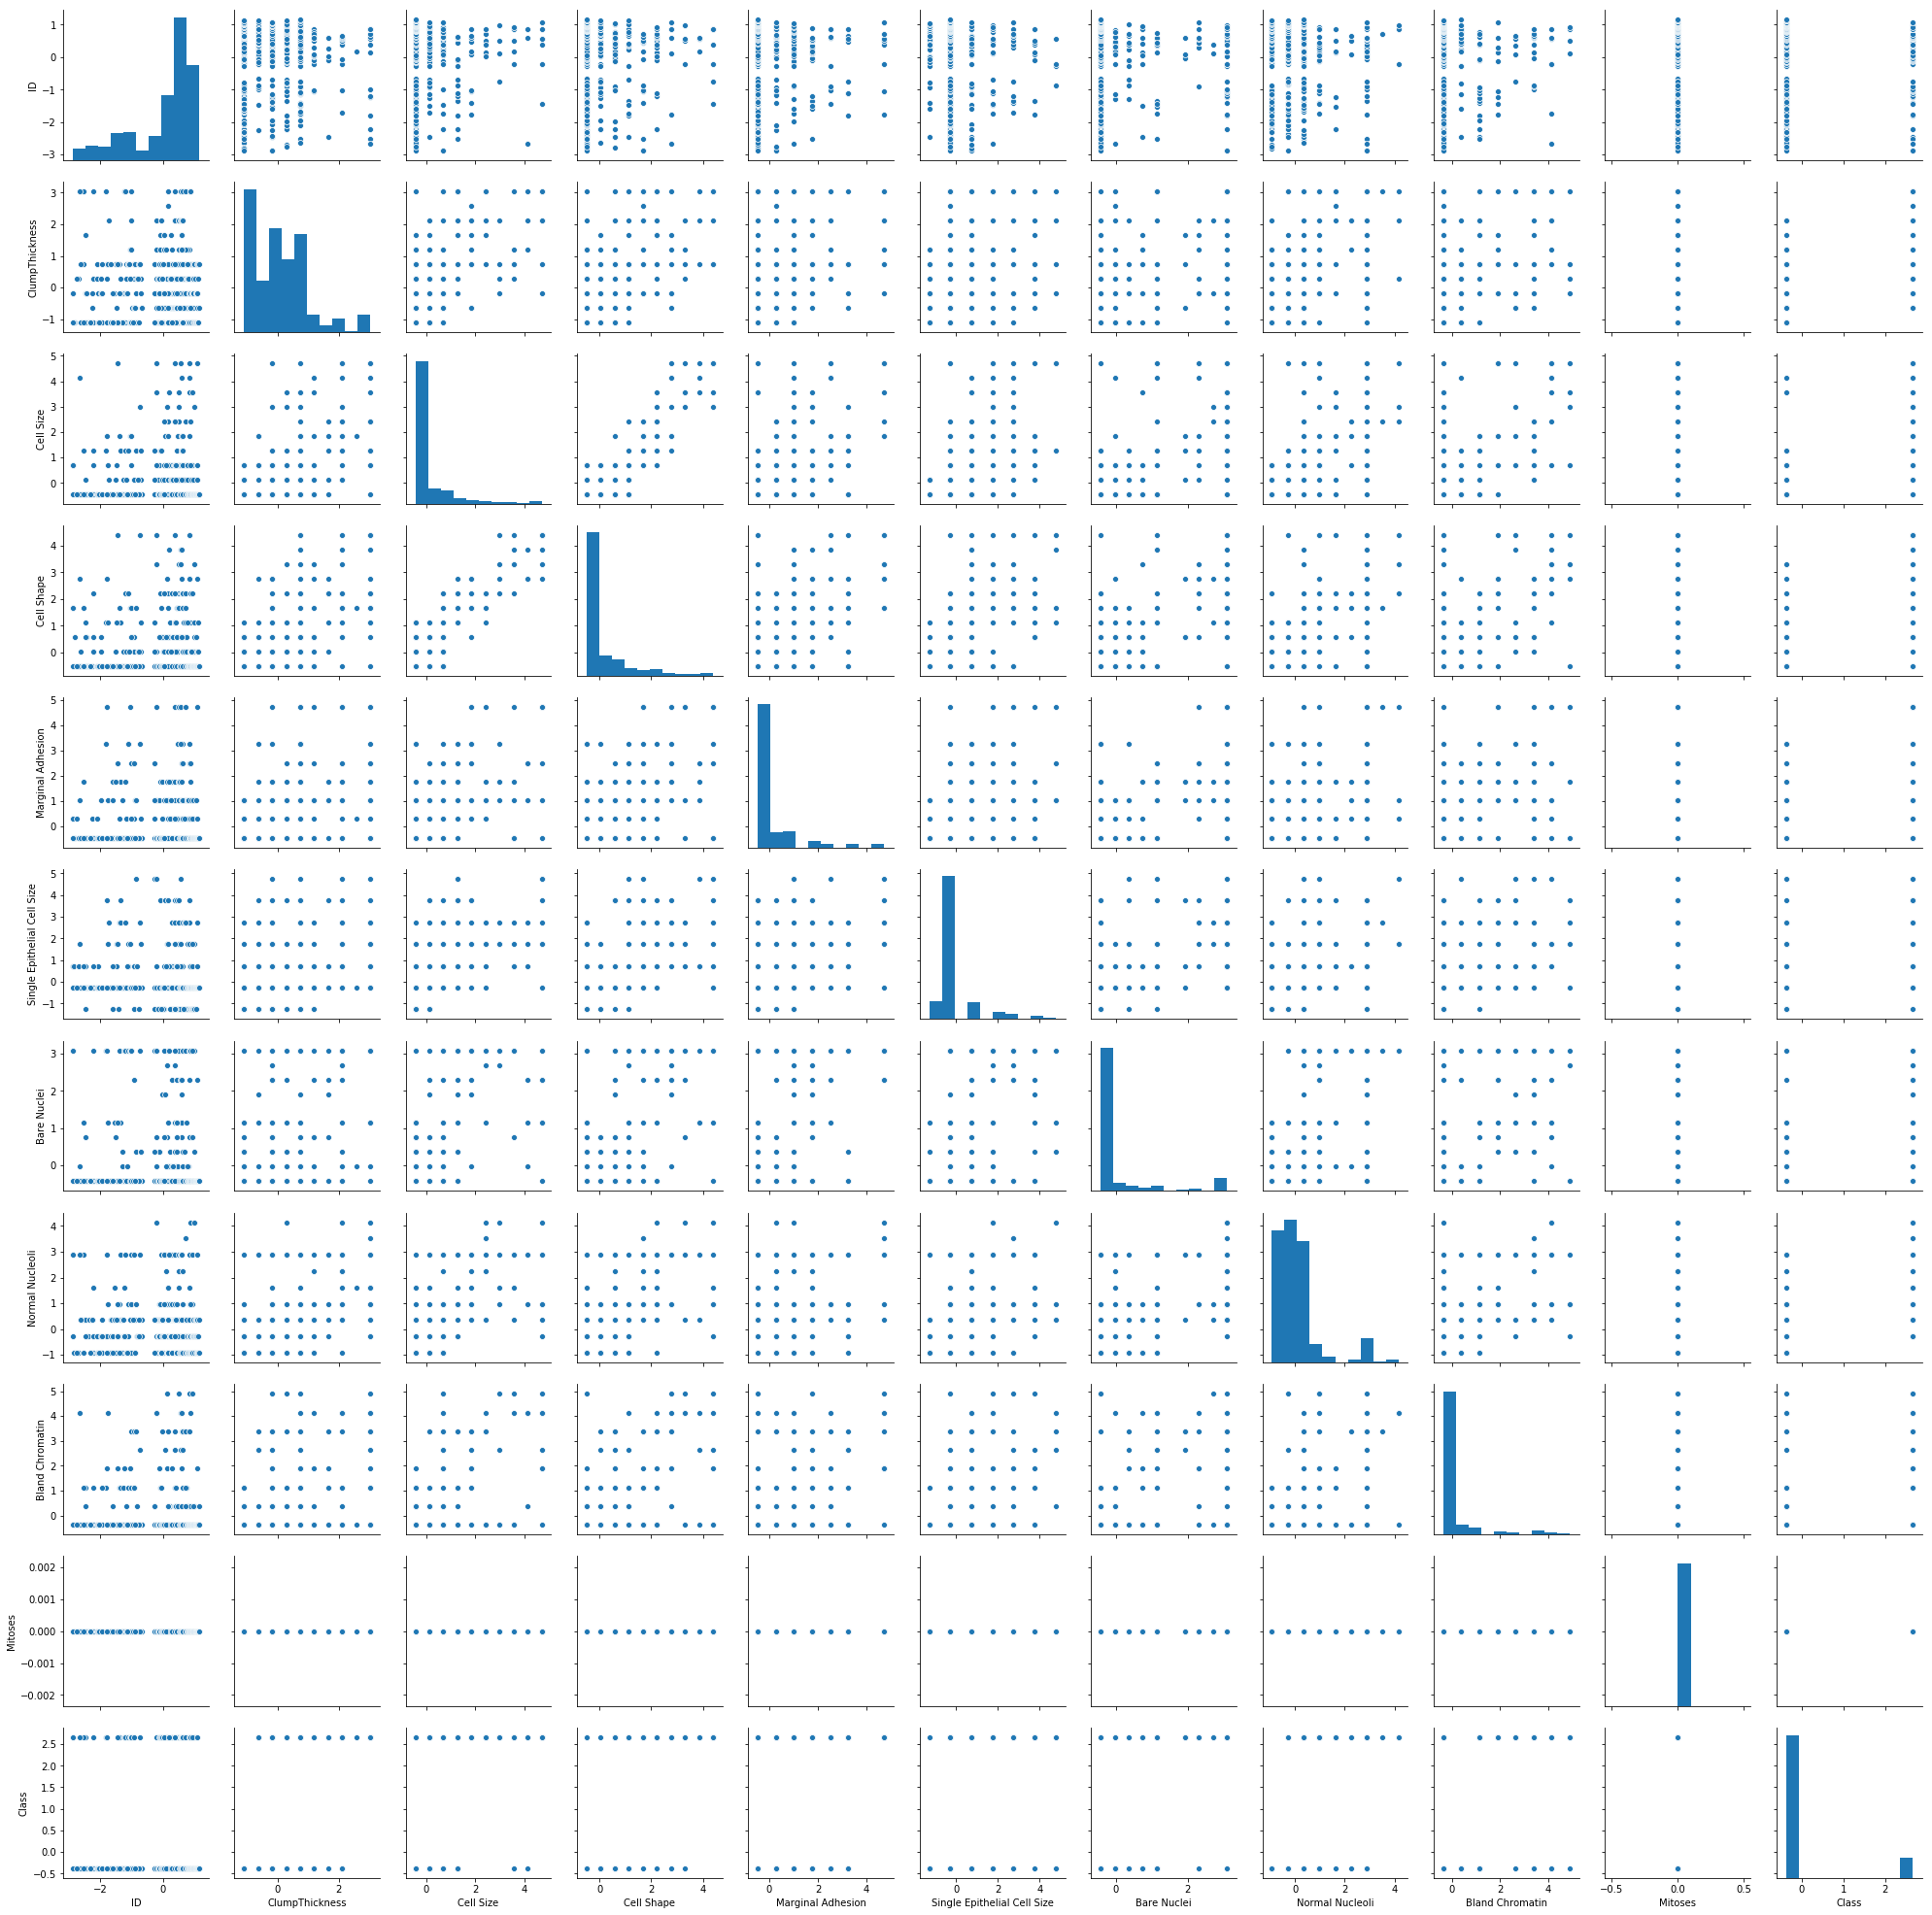

In [104]:
import seaborn as sns
sns.pairplot(scaled_data)

### Divide the dataset into feature set and target set

In [105]:
y=df_out2["Class"].astype('str')
X1=df_out2.drop("Class",axis=1)
X1.shape


(491, 10)

### Divide the Training and Test sets in 70:30 

In [106]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=.30, random_state=0)
print(X1_train.shape,X1_test.shape)

(343, 10) (148, 10)


### Model 1 : Implement a default Decision Tree model with no attributes

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
from IPython.display import Image  
from sklearn import tree
from os import system

Class_Tree_File = open('classtree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Class_Tree_File, feature_names = list(X1_train), class_names = list(y1_train))

Class_Tree_File.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Class"], index = X1_train.columns))


                                Class
ID                           0.014532
ClumpThickness               0.170008
Cell Size                    0.000000
Cell Shape                   0.025807
Marginal Adhesion            0.000000
Single Epithelial Cell Size  0.017987
Bare Nuclei                  0.608463
Normal Nucleoli              0.127123
Bland Chromatin              0.036081
Mitoses                      0.000000


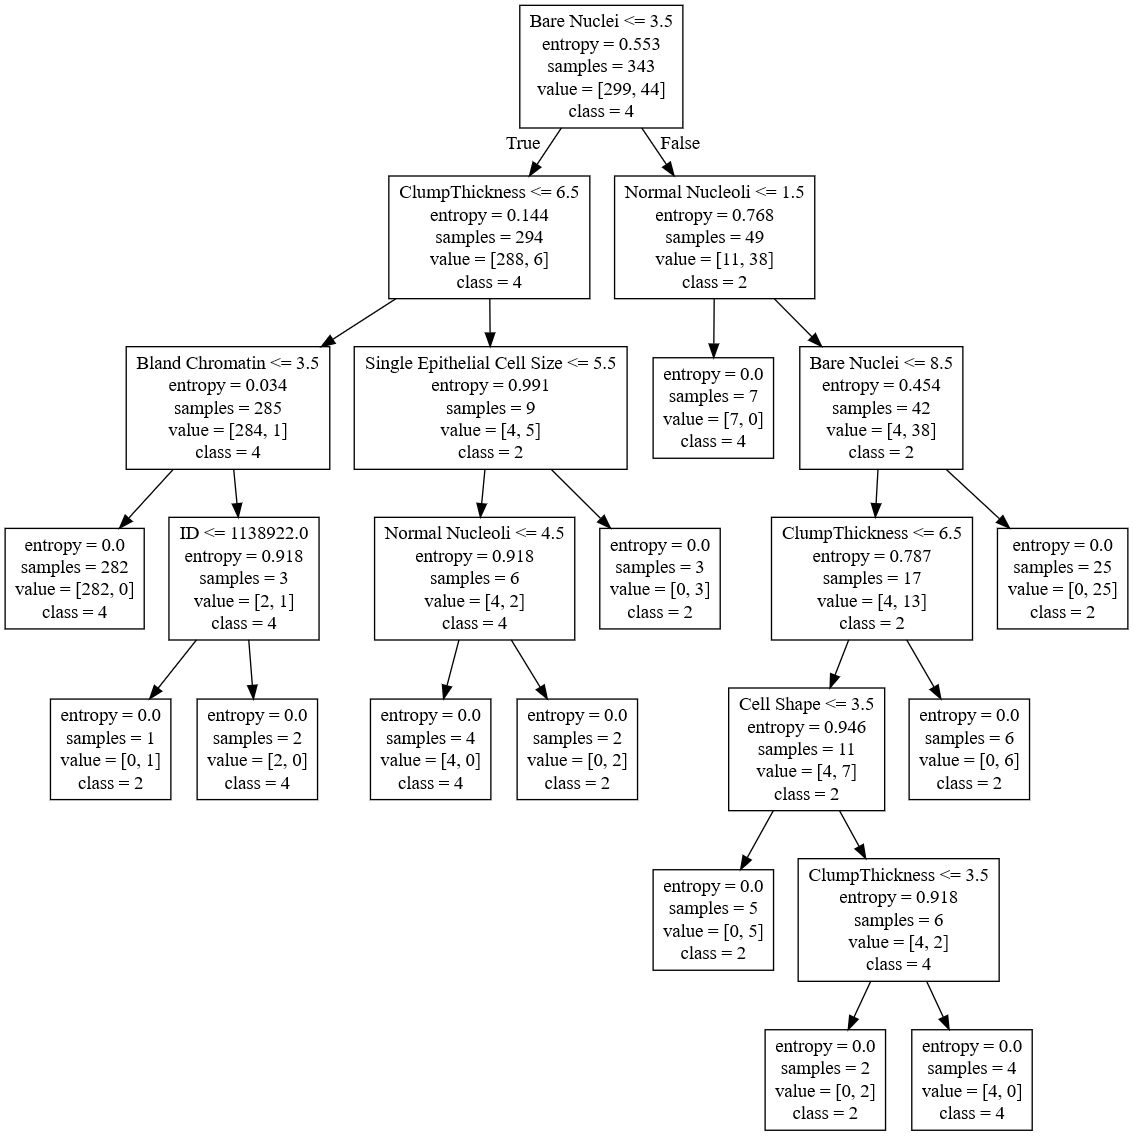

In [109]:
Image("classtree.png")

### Check the feature importances of the Decision Tree model

In [110]:
dt_model.feature_importances_

array([0.01453178, 0.17000765, 0.        , 0.02580743, 0.        ,
       0.01798696, 0.60846275, 0.12712256, 0.03608086, 0.        ])

In [111]:
y_predict = dt_model.predict(X1_train)

In [112]:
print(dt_model.score(X1_train , y1_train))
print(dt_model.score(X1_test , y1_test))

1.0
0.9662162162162162


In [113]:
from sklearn import metrics
print(metrics.confusion_matrix(y1_train, y_predict))

[[299   0]
 [  0  44]]


### Check the training & test accuracy of model 1 

In [114]:
dt_model.score(X1_test ,y1_test)


0.9662162162162162

In [115]:
dt_model.score(X1_train ,y1_train)

1.0

### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [126]:
dt_model_1= DecisionTreeClassifier(criterion = 'entropy', max_depth = 10,max_leaf_nodes=5)
dt_model_1.fit(X1_train, y1_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [128]:
print(dt_model_1.score(X1_train , y1_train))
print(dt_model_1.score(X1_test , y1_test))
y2_predict = dt_model.predict(X1_test)

0.9737609329446064
0.9797297297297297


### Print the confusion matrix of model 1 and model 2

In [123]:
metrics.confusion_matrix(y1_test,y1_predict)


array([[127,   4],
       [  1,  16]], dtype=int64)

In [129]:
metrics.confusion_matrix(y1_test,y2_predict)


array([[127,   4],
       [  1,  16]], dtype=int64)